<a href="https://colab.research.google.com/github/w0nsdoof/Data-Analysis-and-Storage/blob/main/Endterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install everything

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [63]:
!kaggle datasets download -d abdoomoh/daily-covid-19-data-2020-2024

Dataset URL: https://www.kaggle.com/datasets/abdoomoh/daily-covid-19-data-2020-2024
License(s): apache-2.0
daily-covid-19-data-2020-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
!unzip daily-covid-19-data-2020-2024.zip

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv("WHO-COVID-19-global-data.csv",sep=';')

# Dataset Info

In [67]:
print(df.shape)

(57840, 8)


In [68]:
df.head(1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,39028.0,1.988104e+04,2.707823e+05,-65079.0,43.00,393.0,3968.00,40475477.0
Cumulative_cases,57840.0,1.792594e+06,7.797691e+06,0.0,4162.75,45883.0,522087.25,103436829.0
New_deaths,25001.0,2.823239e+02,1.214392e+03,-3432.0,4.00,20.0,105.00,47687.0
Cumulative_deaths,57840.0,2.001023e+04,8.186440e+04,0.0,28.00,565.0,6974.50,1194158.0


# Data Cleansing
## Null values

In [71]:
df.isnull().sum()

,0
Date_reported,0
Country_code,241
Country,0
WHO_region,4338
New_cases,18812
Cumulative_cases,0
New_deaths,32839
Cumulative_deaths,0


In [72]:
df[df["Country_code"].isnull()].head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
35909,05/01/2020,NaN,Namibia,AFRO,NaN,0,NaN,0
35910,12/01/2020,NaN,Namibia,AFRO,NaN,0,NaN,0
35911,19/01/2020,NaN,Namibia,AFRO,NaN,0,NaN,0
35912,26/01/2020,NaN,Namibia,AFRO,NaN,0,NaN,0
35913,02/02/2020,NaN,Namibia,AFRO,NaN,0,NaN,0


In [73]:
df["Country_code"]=df["Country_code"].fillna("NA")

In [74]:
df["New_cases"]=df["New_cases"].fillna(0)

In [75]:
df["New_deaths"]=df["New_deaths"].fillna(0)

## Datatypes

In [76]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'],format='mixed')

In [77]:
df['Year'] = df['Date_reported'].dt.year
df['Month'] = df['Date_reported'].dt.month
df['Day'] = df['Date_reported'].dt.day

## Outliers

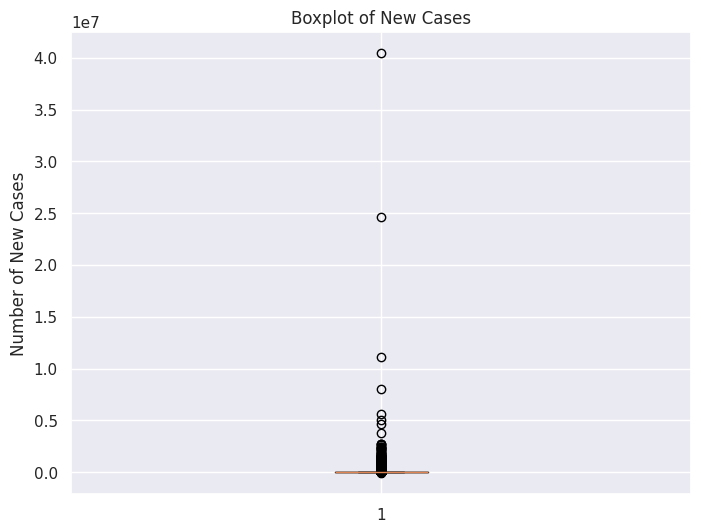

In [83]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["New_cases"])
plt.title('Boxplot of New Cases')
plt.ylabel('Number of New Cases')
plt.show()

In [80]:
# For one column, e.g., "New_cases"
Q1 = df["New_cases"].quantile(0.25)   # 25th percentile
Q3 = df["New_cases"].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                         # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["New_cases"] < lower_bound) | (df["New_cases"] > upper_bound)]

print(outliers)

      Date_reported Country_code      Country WHO_region  New_cases  \
20       2020-05-24           AF  Afghanistan       EMRO     3813.0   
21       2020-05-31           AF  Afghanistan       EMRO     4577.0   
22       2020-07-06           AF  Afghanistan       EMRO     5108.0   
23       2020-06-14           AF  Afghanistan       EMRO     4551.0   
24       2020-06-21           AF  Afghanistan       EMRO     4195.0   
...             ...          ...          ...        ...        ...   
57703    2022-02-01           ZW     Zimbabwe       AFRO    10468.0   
57704    2022-09-01           ZW     Zimbabwe       AFRO     7704.0   
57705    2022-01-16           ZW     Zimbabwe       AFRO     4016.0   
57712    2022-06-03           ZW     Zimbabwe       AFRO     3216.0   
57713    2022-03-13           ZW     Zimbabwe       AFRO     3338.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  Year  Month  Day  
20                 9866        58.0                211  2020      5   24

In [81]:
# Drop outliers and keep only non-outlier data
df_clean = df[(df["New_cases"] >= lower_bound) & (df["New_cases"] <= upper_bound)]

In [ ]:
# IQR method for New_deaths
Q1_deaths = df["New_deaths"].quantile(0.25)
Q3_deaths = df["New_deaths"].quantile(0.75)
IQR_deaths = Q3_deaths - Q1_deaths

lower_bound_deaths = Q1_deaths - 1.5 * IQR_deaths
upper_bound_deaths = Q3_deaths + 1.5 * IQR_deaths

# Remove outliers
df_clean = df_clean[(df_clean["New_deaths"] >= lower_bound_deaths) & (df_clean["New_deaths"] <= upper_bound_deaths)]

# Visualization

## Plotting deaths in a line graph¶

In [41]:
df_date_newdeath=df.groupby("Year").agg({"New_deaths":"sum"}).reset_index().sort_values(by="Year")

In [42]:
df_date_newdeath

,Year,New_deaths
0,2020,1897533.0
1,2021,3549358.0
2,2022,1248805.0
3,2023,319175.0
4,2024,43510.0


<Axes: xlabel='Year', ylabel='New_deaths'>

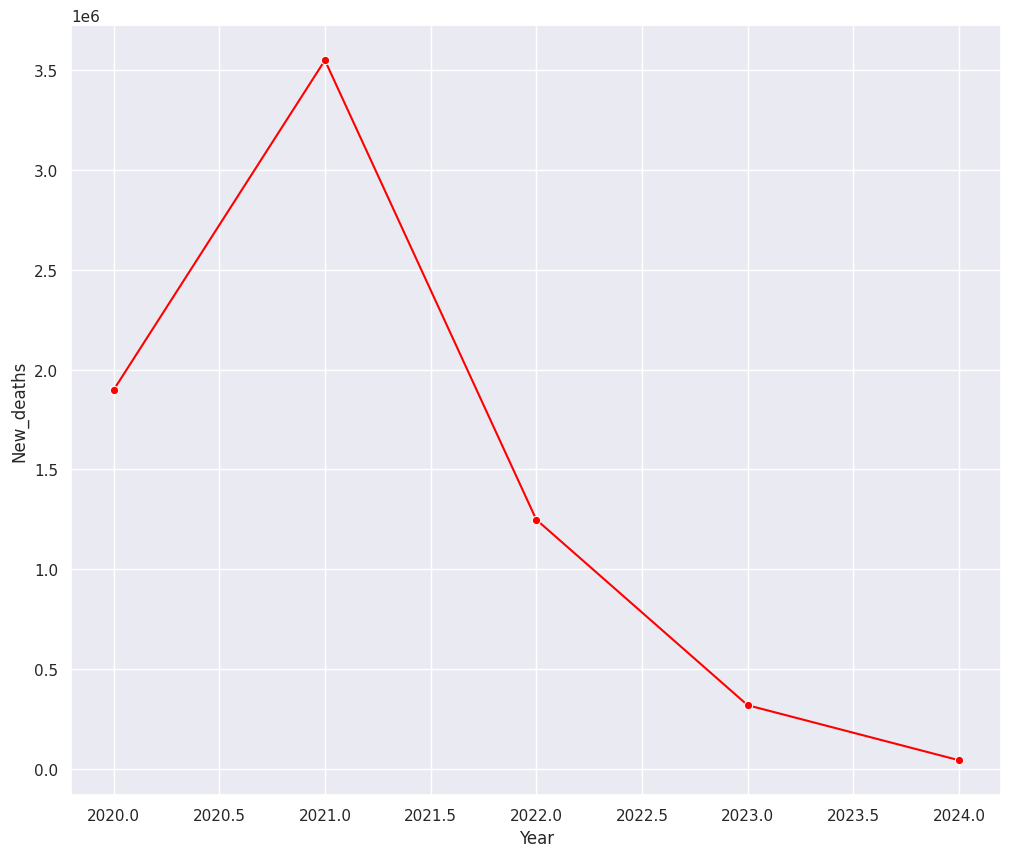

In [43]:
plt.figure(figsize=(12,10))
plt.grid(True)
sns.lineplot(data=df_date_newdeath,x="Year",y="New_deaths",marker="o",color="red")

## Plotting cases in a line graph

In [44]:
df_date_newcase=df.groupby("Year").agg({"New_cases":"sum"}).reset_index().sort_values(by="Year")

<Axes: xlabel='Year', ylabel='New_cases'>

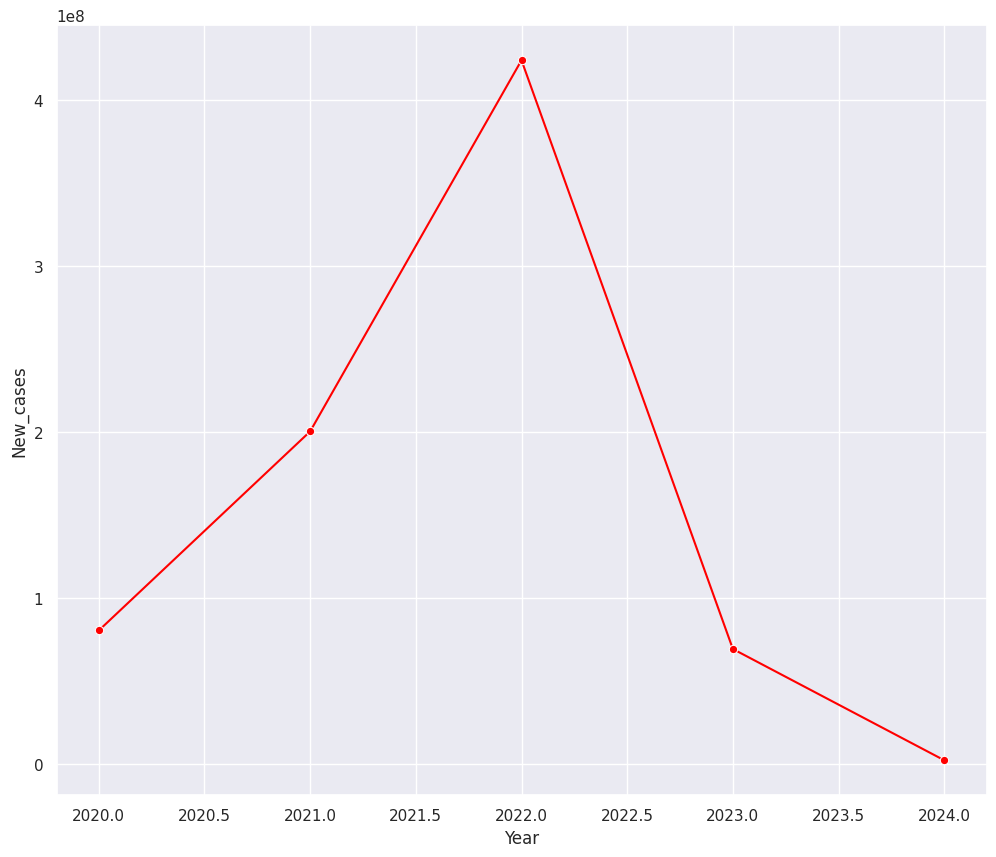

In [45]:
plt.figure(figsize=(12,10))
plt.grid(True)
sns.lineplot(data=df_date_newcase,x="Year",y="New_cases",marker="o",color="red")

## Top 10 countries with the most deaths¶

In [46]:
df_most_death_top10country=df.groupby("Country").agg({"New_deaths":"sum"}).reset_index().sort_values(by="New_deaths",ascending=False).head(10)

<Axes: xlabel='Country', ylabel='New_deaths'>

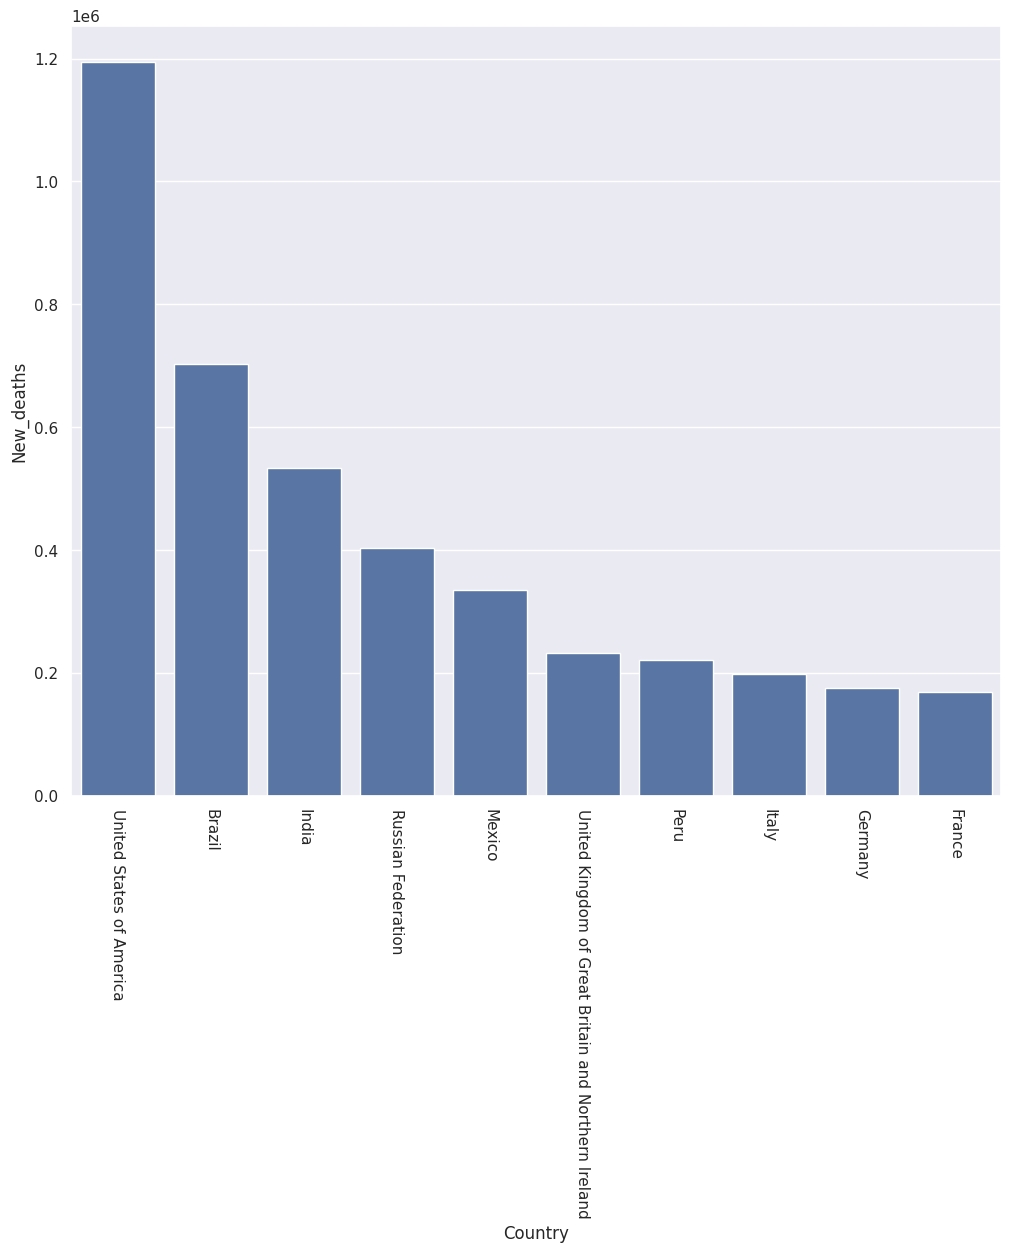

In [47]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=-90)
sns.barplot(data=df_most_death_top10country,x="Country",y="New_deaths")

## Top 10 countries with the most cases

In [48]:
df_most_case_top10country=df.groupby("Country").agg({"New_cases":"sum"}).reset_index().sort_values(by="New_cases",ascending=False).head(10)

In [49]:
df_most_case_top10country

,Country,New_cases
229,United States of America,103436829.0
42,China,99375079.0
96,India,45042054.0
72,France,38997490.0
78,Germany,38437756.0
28,Brazil,37511921.0
175,Republic of Korea,34571873.0
111,Japan,33803572.0
109,Italy,26781078.0
226,United Kingdom of Great Britain and Northern I...,24976777.0


<Axes: xlabel='Country', ylabel='Sum of Deaths'>

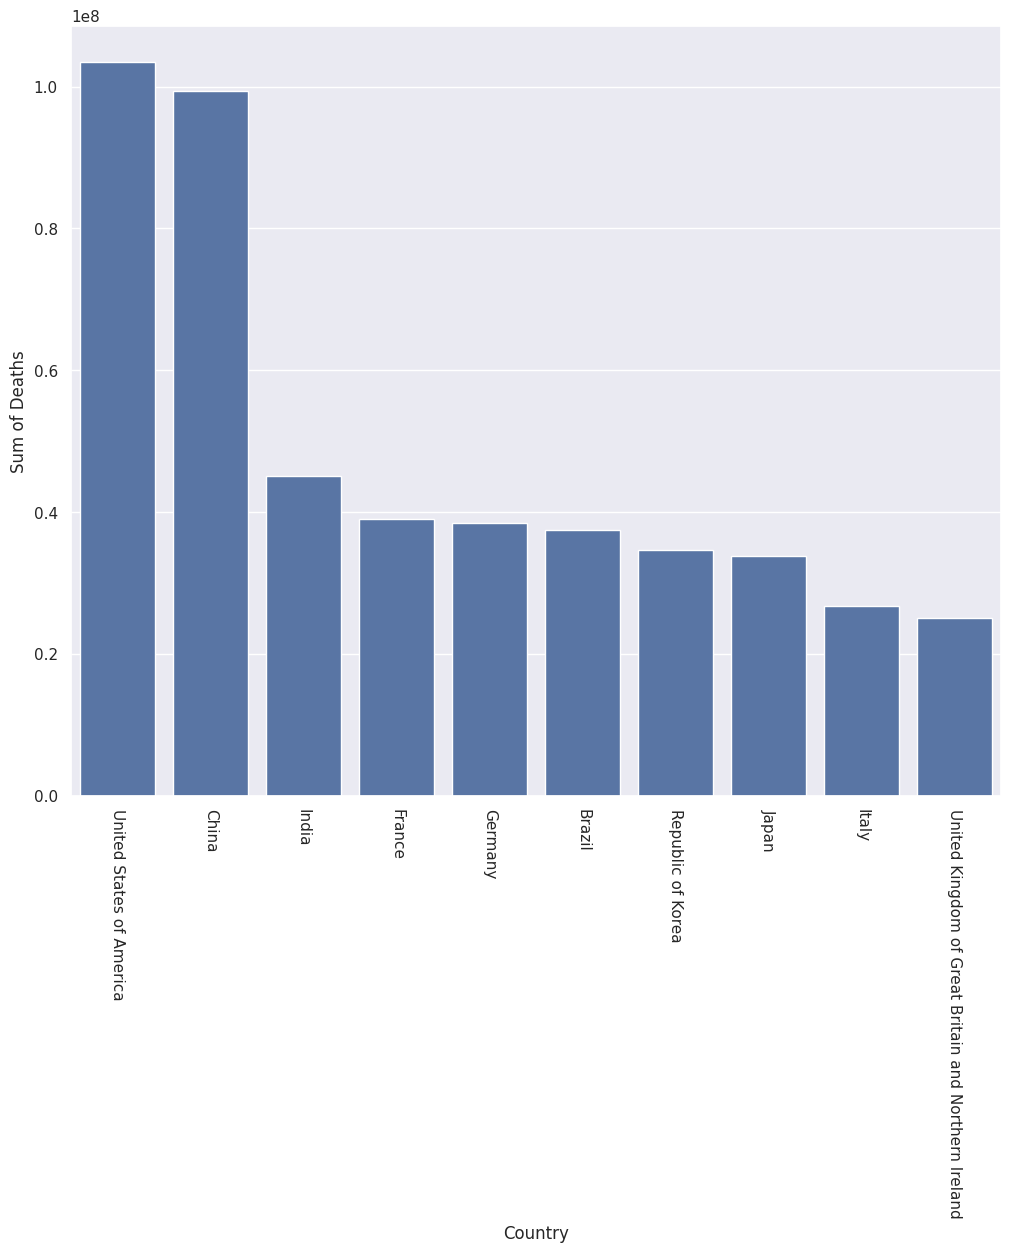

In [50]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=-90)
plt.ylabel("Sum of Deaths")
sns.barplot(data=df_most_case_top10country,x="Country",y="New_cases")

## Countries with the most deaths relative to cases

In [52]:
df_sum_of_case_and_death=df.groupby("Country").agg({"New_cases":"sum","New_deaths":"sum"}).reset_index()

In [53]:
df_sum_of_case_and_death

,Country,New_cases,New_deaths
0,Afghanistan,235214.0,7998.0
1,Albania,335047.0,3605.0
2,Algeria,272139.0,6881.0
3,American Samoa,8359.0,34.0
4,Andorra,48015.0,159.0
...,...,...,...
235,Wallis and Futuna,3760.0,9.0
236,Yemen,11945.0,2159.0
237,Zambia,349842.0,4077.0
238,Zimbabwe,266386.0,5740.0


In [54]:
df_sum_of_case_and_death["Death_ratio"]=df_sum_of_case_and_death["New_deaths"]/df_sum_of_case_and_death["New_cases"]

In [56]:
df_sum_of_case_and_death["Death_ratio"]=df_sum_of_case_and_death["Death_ratio"]*100

In [57]:
df_sum_of_case_and_death

,Country,New_cases,New_deaths,Death_ratio
0,Afghanistan,235214.0,7998.0,340.030780
1,Albania,335047.0,3605.0,107.596845
2,Algeria,272139.0,6881.0,252.848728
3,American Samoa,8359.0,34.0,40.674722
4,Andorra,48015.0,159.0,33.114652
...,...,...,...,...
235,Wallis and Futuna,3760.0,9.0,23.936170
236,Yemen,11945.0,2159.0,1807.450816
237,Zambia,349842.0,4077.0,116.538323
238,Zimbabwe,266386.0,5740.0,215.476789


In [58]:
df_sum_of_case_and_death_top10=df_sum_of_case_and_death.sort_values(by="Death_ratio",ascending=False).head(10)

In [59]:
df_sum_of_case_and_death_top10

,Country,New_cases,New_deaths,Death_ratio
236,Yemen,11945.0,2159.0,1807.450816
206,Sudan,63993.0,5046.0,788.523745
210,Syrian Arab Republic,57423.0,3163.0,550.824582
201,Somalia,27334.0,1361.0,497.914685
168,Peru,4526977.0,220975.0,488.129275
61,Egypt,516023.0,24830.0,481.180102
140,Mexico,7620108.0,334586.0,439.083016
26,Bosnia and Herzegovina,403666.0,16392.0,406.078292
124,Liberia,7930.0,294.0,370.744010
0,Afghanistan,235214.0,7998.0,340.030780


<Axes: xlabel='Country', ylabel='Sum of Deaths'>

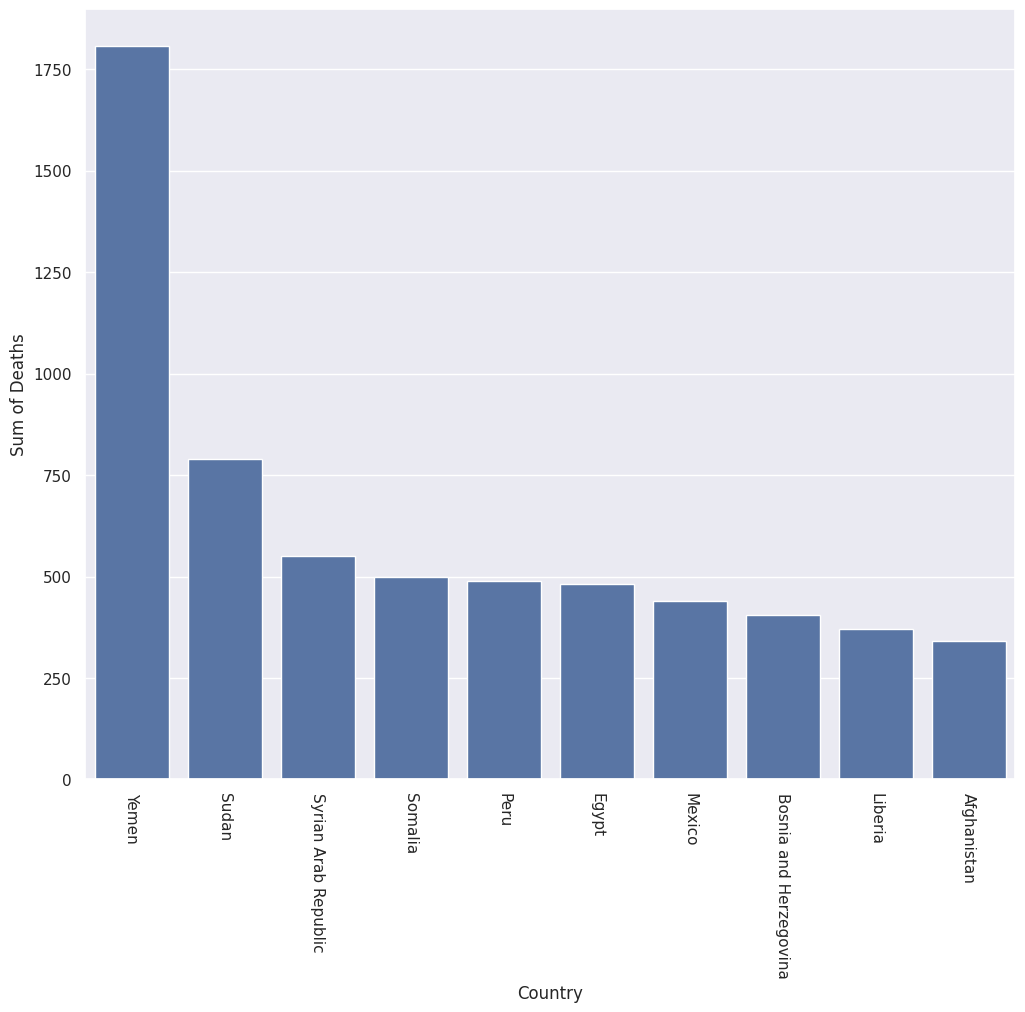

In [60]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=-90)
plt.ylabel("Sum of Deaths")
sns.barplot(data=df_sum_of_case_and_death_top10,x="Country",y="Death_ratio")

# Insights and Recommendations

## Insights

1. **Countries with the Highest Total Cases**
   - A small number of countries account for a major proportion of global COVID-19 cases.
   - These countries may have larger populations, higher urban density, or greater testing/reporting capacity.

2. **Deaths Trend Over Time**
   - The global death toll shows sharp increases at specific periods, indicating multiple pandemic waves and the emergence of new virus variants.

3. **Relationship Between Cases and Deaths**
   - Higher case numbers generally correlate with higher death numbers.
   - However, some countries have a lower death rate despite high case counts, suggesting differences in healthcare systems, government responses, or population demographics.

4. **Top 10 Countries Dominance**
   - The top 10 countries by total cases contribute significantly to the worldwide totals.
   - Changes in pandemic dynamics in these countries have a strong impact on global statistics.

5. **Presence of Outliers**
   - Sudden spikes in reported cases or deaths likely reflect reporting delays, corrections, or real events like mass testing days.
   - These must be carefully considered during trend analysis.

---

## Recommendations

- **Focus Interventions on Highly Affected Countries**
  - Targeted public health measures in the most affected countries can substantially reduce global case numbers and deaths.

- **Strengthen Data Reporting and Quality**
  - Encourage consistent and timely reporting of daily cases and deaths to minimize the impact of delayed or bulk-reported data.

- **Prepare for Sudden Pandemic Waves**
  - Governments and healthcare systems should monitor rising trends closely and prepare for sudden spikes (e.g., increasing hospital capacities, stockpiling medical supplies).

- **Analyze Outliers Contextually**
  - Instead of automatically removing all outliers, analyze them in context to distinguish between data errors and significant real-world events.

- **Promote Healthcare System Strengthening**
  - Countries with disproportionately high death rates should prioritize strengthening healthcare capacity, early detection, and treatment accessibility.

- **Utilize Visual Analytics Regularly**
  - Regular use of visualization tools like boxplots and line graphs can help policymakers and researchers quickly spot trends and anomalies.

